In [4]:
from pycaret.datasets import get_data
dataset = get_data('diamond')

Carat Weight    Cut Color Clarity Polish Symmetry Report  Price
0          1.10  Ideal     H     SI1     VG       EX    GIA   5169
1          0.83  Ideal     H     VS1     ID       ID   AGSL   3470
2          0.85  Ideal     H     SI1     EX       EX    GIA   3183
3          0.91  Ideal     E     SI1     VG       VG    GIA   4370
4          0.83  Ideal     G     SI1     EX       EX    GIA   3171

In [5]:
dataset.shape

(6000, 8)

In [7]:
data = dataset.sample(frac=0.9, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data for Predictions: ' + str(data_unseen.shape))

Data for Modeling: (5400, 8)
Unseen Data for Predictions: (600, 8)


In [8]:
from pycaret.regression import *
exp_reg101 = setup(data=data, target='Price', session_id=123)

In [9]:
best = compare_models(exclude=['ransac'])

In [10]:
ada = create_model('ada')

In [12]:
print(ada)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=123)


In [11]:
lightgbm = create_model('lightgbm')

In [13]:
print(lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [14]:
dt = create_model('dt')

In [15]:
print(dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


In [16]:
tuned_ada = tune_model(ada)

In [17]:
print(tuned_ada)

AdaBoostRegressor(base_estimator=None, learning_rate=0.175, loss='exponential',
                  n_estimators=60, random_state=123)


In [18]:
import numpy as np
lgbm_params = {'num_leaves': np.arange(10,200,10), 'max_depth': [int(x) for x in np.linspace(10, 110, num=11)],
              'learning_rate': np.arange(0.1,1.0,0.1)}

In [19]:
tuned_lightgbm = tune_model(lightgbm, custom_grid=lgbm_params)

In [20]:
print(tuned_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [21]:
tuned_dt = tune_model(dt)

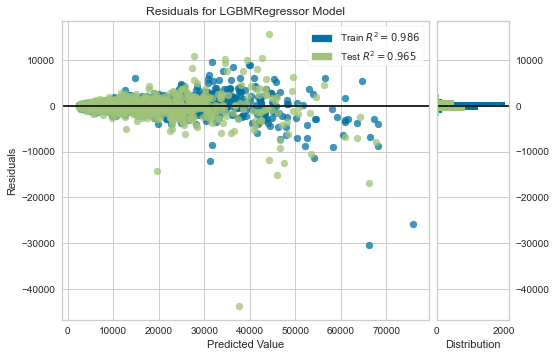

In [22]:
plot_model(tuned_lightgbm)

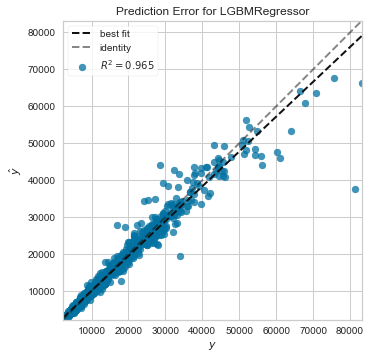

In [23]:
plot_model(tuned_lightgbm, plot='error')

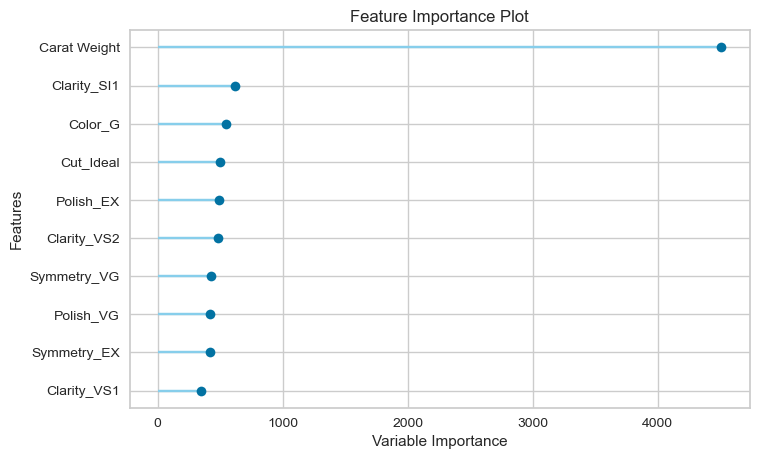

In [24]:
plot_model(tuned_lightgbm, plot='feature')

In [25]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'paramâ€¦

In [26]:
predict_model(tuned_lightgbm);

In [27]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [28]:
print(final_lightgbm)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=60,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=120, objective=None,
              random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [29]:
predict_model(final_lightgbm);

In [30]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

Carat Weight        Cut Color Clarity Polish Symmetry Report  Price  \
0          1.53      Ideal     E     SI1     ID       ID   AGSL  12791   
1          1.50       Fair     F     SI1     VG       VG    GIA  10450   
2          1.01       Good     E     SI1      G        G    GIA   5161   
3          2.51  Very Good     G     VS2     VG       VG    GIA  34361   
4          1.01       Good     I     SI1     VG       VG    GIA   4238   

          Label  
0  12262.949782  
1  10122.442382  
2   5032.520456  
3  34840.379469  
4   4142.695964

In [31]:
from pycaret.utils import check_metric
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9779

In [32]:
save_model(final_lightgbm, 'final_models/Final LightGBM Model 30Nov2020')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='Price',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy='...
                  LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=60,
                                min_child_samples=20, min_child_weight=0.001,
                  

In [33]:
saved_final_lightgbm = load_model('final_models/Final LightGBM Model 30Nov2020')

Transformation Pipeline and Model Successfully Loaded


In [34]:
new_prediction = predict_model(saved_final_lightgbm, data=data_unseen)

In [35]:
new_prediction.head()

Carat Weight        Cut Color Clarity Polish Symmetry Report  Price  \
0          1.53      Ideal     E     SI1     ID       ID   AGSL  12791   
1          1.50       Fair     F     SI1     VG       VG    GIA  10450   
2          1.01       Good     E     SI1      G        G    GIA   5161   
3          2.51  Very Good     G     VS2     VG       VG    GIA  34361   
4          1.01       Good     I     SI1     VG       VG    GIA   4238   

          Label  
0  12262.949782  
1  10122.442382  
2   5032.520456  
3  34840.379469  
4   4142.695964

In [36]:
check_metric(unseen_predictions.Price, unseen_predictions.Label, 'R2')

0.9779